# Скрэйпинг API hh.ru

---



Небольшой скрэйпер для поиска вакансий, связанных с Data Science
<br>
Использованы запросы к API сайта [hh.ru](https://hh.ru/)
<br>
Проведен анализ основных работадателей, вакансий и зарплатных вилок на рынке

In [1]:
#импорт
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import json
from datetime import datetime, timedelta

In [23]:
#constants
URL = 'https://api.hh.ru'
#ключевые слова для поиска, можно корректировать по желанию
TEXT =  f'SQL NAME:("Machine Learning Engineer" OR "Data Scientist" OR "Дата саентист" OR "Machine Learning Developer" or "Machine Learning Researcher" or "Искусственный интеллект" or "Машинное обучение" or "Специалист по machine learning" or "Специалист по машинному обучению" or "AI engineer" or "Разработчик ML" or "Data Science" or "Machine Learning" or "Artificial Intelligence" or "ML Engineer")'
dt_now = datetime.now().date()

dt_from = dt_now - timedelta(days = 7)   #задание интервала для поиска вакансий
DATE_TO = dt_now.isoformat()
DATE_FROM = dt_from.isoformat()
#форматирование url для подачи запроса
VAC_URL = URL + f'/vacancies?text={TEXT}&date_from={DATE_FROM}&date_to={DATE_TO}&responses_count_enabled=True&per_page=100'
#указание опыта работы
experience = ['noExperience',
               'between1And3',
               'between3And6',
               'moreThan6']

In [3]:
#функции
def get_id(x,key = 'id', nan_val = np.nan):
  try:
    return x[key]
  except Exception as e:
    return nan_val


In [4]:
#style
plt.style.use('bmh')

## Обращение к API

In [5]:
#dataframe
vacancy_df = pd.DataFrame()

In [6]:
#API request
for exp in experience:
  page = 0
  url = VAC_URL + f'&experience={exp}'
  try:
    request = requests.get(url + f'&page={page}')
    data = json.loads(request.text)
    items = data['items']
    for page in range(1,data['pages']):
      request = requests.get(url + f'&page={page}')
      #add
      #time_request =
      #end
      data = json.loads(request.text)
      items += data['items']
    df = pd.DataFrame(items)
    df['Experience'] = exp
    vacancy_df = pd.concat([vacancy_df,df])
  except Exception as e:
    print(exp, ' - ', e)
    time.sleep(5)


In [7]:
#check
vacancy_df.head()

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,working_time_intervals,working_time_modes,accept_temporary,professional_roles,accept_incomplete_resumes,experience,employment,adv_response_url,is_adv_vacancy,Experience
0,85085309,False,Junior Machine Learning Engineer,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 100000, 'to': 150000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",None,...,[],[],False,"[{'id': '165', 'name': 'Дата-сайентист'}]",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}",None,False,noExperience
1,85068648,False,Data Scientist,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 70000, 'to': 115000, 'currency': 'RUR...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Колодезный переу...",...,[],[],False,"[{'id': '156', 'name': 'BI-аналитик, аналитик ...",True,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}",None,False,noExperience
2,84046041,False,Junior Data Scientist (Специалист по анализу д...,None,True,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': '1-й переулок Тру...",...,[],[],False,"[{'id': '10', 'name': 'Аналитик'}]",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}",None,False,noExperience
3,85072394,False,Экономист-аналитик (junior/middle data scientist),None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'проспект Академи...",...,[],[],False,"[{'id': '10', 'name': 'Аналитик'}]",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}",None,False,noExperience
4,84853996,False,Middle/Senior Data Scientist (команда Operatio...,None,False,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,[],[],False,"[{'id': '165', 'name': 'Дата-сайентист'}]",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}",None,False,noExperience


In [8]:
#сброс индексов
vacancy_df.reset_index(drop = True, inplace = True)

In [9]:
#get info from df
vacancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         125 non-null    object
 1   premium                    125 non-null    bool  
 2   name                       125 non-null    object
 3   department                 38 non-null     object
 4   has_test                   125 non-null    bool  
 5   response_letter_required   125 non-null    bool  
 6   area                       125 non-null    object
 7   salary                     24 non-null     object
 8   type                       125 non-null    object
 9   address                    38 non-null     object
 10  response_url               0 non-null      object
 11  sort_point_distance        0 non-null      object
 12  published_at               125 non-null    object
 13  created_at                 125 non-null    object
 14  archived  

## Анализ датафрейма

Рассмотрим примеры полученных словарей

In [10]:
#содержание json записи о работодателе
vacancy_df['employer'][0]

{'id': '51900',
 'name': 'Siberian Wellness',
 'url': 'https://api.hh.ru/employers/51900',
 'alternate_url': 'https://hh.ru/employer/51900',
 'logo_urls': {'240': 'https://hhcdn.ru/employer-logo/2793640.png',
  '90': 'https://hhcdn.ru/employer-logo/2793639.png',
  'original': 'https://hhcdn.ru/employer-logo-original/588096.png'},
 'vacancies_url': 'https://api.hh.ru/vacancies?employer_id=51900',
 'accredited_it_employer': False,
 'trusted': True}

In [11]:
vacancy_df['published_at']

0      2023-08-15T07:07:32+0300
1      2023-08-14T17:40:30+0300
2      2023-08-13T10:42:58+0300
3      2023-08-14T19:18:32+0300
4      2023-08-09T18:05:18+0300
                 ...           
120    2023-08-11T15:02:28+0300
121    2023-08-14T16:27:28+0300
122    2023-08-11T13:12:30+0300
123    2023-08-10T10:39:48+0300
124    2023-08-12T16:58:09+0300
Name: published_at, Length: 125, dtype: object

In [12]:
#строки с ненулевой зарплатой
vacancy_df[vacancy_df['salary'].isna() == False]['salary'][12]

{'from': 130000, 'to': 250000, 'currency': 'RUR', 'gross': False}

In [13]:
#отделы внутренней структуры работодателя
vacancy_df['department']

0                                                   None
1                                                   None
2                                                   None
3                                                   None
4                                                   None
                             ...                        
120                                                 None
121    {'id': '3529-3529-prof', 'name': 'Сбер для экс...
122                                                 None
123    {'id': '3529-3529-prof', 'name': 'Сбер для экс...
124                                                 None
Name: department, Length: 125, dtype: object

In [14]:
#число откликов
vacancy_df['counters']

0      {'responses': 128, 'total_responses': 128}
1      {'responses': 163, 'total_responses': 163}
2      {'responses': 339, 'total_responses': 339}
3        {'responses': 41, 'total_responses': 41}
4        {'responses': 24, 'total_responses': 24}
                          ...                    
120      {'responses': 25, 'total_responses': 25}
121        {'responses': 3, 'total_responses': 3}
122        {'responses': 9, 'total_responses': 9}
123       {'responses': 7, 'total_responses': 26}
124      {'responses': 18, 'total_responses': 18}
Name: counters, Length: 125, dtype: object

In [17]:
#пустой датафрейм для формирования наиболее полезных признаков
df_clean = pd.DataFrame()

In [21]:
#анализ словарей
#формирование наиболее информативных полей для соискателя
df_clean['employer'] = vacancy_df['employer'].apply(get_id, key = 'name')
df_clean['name'] = vacancy_df['name']
df_clean['id'] = vacancy_df['id']
df_clean['published_at'] = pd.to_datetime(vacancy_df['published_at'])
df_clean['accredited'] = vacancy_df['employer'].apply(get_id, key = 'accredited_it_employer')
df_clean['department'] = vacancy_df['department'].apply(get_id, key = 'name')
df_clean['salary_from'] = vacancy_df['department'].apply(get_id, key = 'from')
df_clean['salary_to'] = vacancy_df['salary'].apply(get_id, key = 'to')
df_clean['salary_gross'] = vacancy_df['salary'].apply(get_id, key = 'gross')
df_clean['currency'] = vacancy_df['salary'].apply(get_id, key = 'currency')
df_clean['responses'] = vacancy_df['counters'].apply(get_id, key = 'responses')
df_clean['tot_responses'] = vacancy_df['counters'].apply(get_id, key = 'total_responses')
df_clean['city'] = vacancy_df['area'].apply(get_id, key = 'name')
df_clean['experience'] = vacancy_df['Experience']

In [22]:
#опыт работы можно задать любым
experience_map = {'noExperience':'Без опыта',
               'between1And3' : 'От 1 до 3 лет',
               'between3And6' : 'От 3 до 6 лет',
               'moreThan6' : 'Больше 6 лет'
               }
df_clean['experience'] = df_clean['experience'].map(experience_map, na_action = 'ignore')

In [20]:
#check
df_clean

,employer,name,id,published_at,accredited,department,salary_from,salary_to,salary_gross,currency,responses,tot_responses,city,experience
0,Siberian Wellness,Junior Machine Learning Engineer,85085309,2023-08-15 07:07:32+03:00,False,NaN,NaN,150000.0,False,RUR,128,128,Москва,Без опыта
1,ЕМЕ,Data Scientist,85068648,2023-08-14 17:40:30+03:00,False,NaN,NaN,115000.0,True,RUR,163,163,Москва,Без опыта
2,АлгоМост,Junior Data Scientist (Специалист по анализу д...,84046041,2023-08-13 10:42:58+03:00,False,NaN,NaN,NaN,NaN,NaN,339,339,Москва,Без опыта
3,Аналитический центр при Правительстве Российск...,Экономист-аналитик (junior/middle data scientist),85072394,2023-08-14 19:18:32+03:00,False,NaN,NaN,NaN,NaN,NaN,41,41,Москва,Без опыта
4,СберМаркет,Middle/Senior Data Scientist (команда Operatio...,84853996,2023-08-09 18:05:18+03:00,True,NaN,NaN,NaN,NaN,NaN,24,24,Санкт-Петербург,Без опыта
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Samokat.tech,Руководитель департамента Data Science,84952109,2023-08-11 15:02:28+03:00,False,NaN,NaN,NaN,NaN,NaN,25,25,Москва,Больше 6 лет
121,СБЕР,Team Lead Data Scientist,85062441,2023-08-14 16:27:28+03:00,False,Сбер для экспертов,NaN,NaN,NaN,NaN,3,3,Москва,Больше 6 лет
122,Merk Team,Data Scientist (C++),84945310,2023-08-11 13:12:30+03:00,False,NaN,NaN,NaN,NaN,NaN,9,9,Тбилиси,Больше 6 лет
123,СБЕР,Team Lead Data Scientist,83291550,2023-08-10 10:39:48+03:00,False,Сбер для экспертов,NaN,NaN,NaN,NaN,7,26,Москва,Больше 6 лет


In [25]:
#сортировка по столбцу "Зарплата ДО"
df_clean.sort_values('salary_to',ascending = False).head(20)

,employer,name,id,published_at,accredited,department,salary_from,salary_to,salary_gross,currency,responses,tot_responses,city,experience
57,Яндекс,Lead Data Scientist в R&D-команду логистики Ма...,83441997,2023-08-13 13:52:47+03:00,False,NaN,NaN,650000.0,False,RUR,5,57,Москва,От 3 до 6 лет
65,Яндекс,Lead Data Scientist в R&D-команду логистики Ма...,83442000,2023-08-13 13:52:47+03:00,False,NaN,NaN,650000.0,False,RUR,7,23,Санкт-Петербург,От 3 до 6 лет
84,Яндекс,Lead Data Scientist в R&D-команду логистики Ма...,83442001,2023-08-13 13:52:47+03:00,False,NaN,NaN,650000.0,False,RUR,3,17,Сербия,От 3 до 6 лет
72,Rubbles,Data Scientist (middle/senior),70163749,2023-08-10 14:04:07+03:00,True,NaN,NaN,450000.0,True,RUR,10,724,Москва,От 3 до 6 лет
68,Мамаева Ирина Анатольевна,Data Scientist middle+/Senior,84255351,2023-08-15 09:35:31+03:00,False,NaN,NaN,380000.0,False,RUR,162,162,Москва,От 3 до 6 лет
67,CyberBrain (ООО Брайнфарм),Senior Data Scientist / Старший аналитик данных,84654666,2023-08-13 12:24:06+03:00,True,NaN,NaN,350000.0,False,RUR,40,40,Москва,От 3 до 6 лет
95,ИСТ,Senior Python Developer ML,83450677,2023-08-13 16:06:46+03:00,False,NaN,NaN,350000.0,True,RUR,1,14,Санкт-Петербург,От 3 до 6 лет
10,Predicto,Middle Machine Learning Engineer,84853926,2023-08-09 18:03:15+03:00,False,NaN,NaN,300000.0,False,RUR,115,115,Москва,От 1 до 3 лет
16,МФК ВЭББАНКИР,Data scientist / Аналитик риск-моделей,85027720,2023-08-14 11:11:52+03:00,False,NaN,NaN,300000.0,False,RUR,74,74,Москва,От 1 до 3 лет
12,Кадровый центр Президент,Разработчик скоринговых моделей/Data scientist,84829254,2023-08-09 13:10:45+03:00,False,NaN,NaN,250000.0,False,RUR,134,134,Москва,От 1 до 3 лет


In [26]:
#NaNs in df
df_clean.isna().sum()

employer           0
name               0
id                 0
published_at       0
accredited         0
department        87
salary_from      125
salary_to        109
salary_gross     101
currency         101
responses          0
tot_responses      0
city               0
experience         0
dtype: int64

Можно заметить, что наибольшее число пропусков приходится на зарплатные вилки и валюту

In [ ]:
#дубликаты
df_clean[df_clean.duplicated(['employer','name','city'], keep = False)][['employer','name','city','experience']]

,employer,name,city,experience
0,Changellenge,Стажер по направлению Аналитика и Data Science,Санкт-Петербург,Без опыта
1,Инкаб,Стажер в DS (Data Science) и ML (Machine Learn...,Пермь,Без опыта
2,Changellenge,Стажер по направлению Аналитика и Data Science,Казань,Без опыта
3,Changellenge,Стажер по направлению Аналитика и Data Science,Новосибирск,Без опыта
4,Changellenge,Стажер по направлению Аналитика и Data Science,Томск,Без опыта
...,...,...,...,...
458,Самокат (ООО Умное пространство),Руководитель департамента Data Science,Москва,Больше 6 лет
459,СБЕР,Data Scientist – Senior/Chief,Москва,Больше 6 лет
460,Детский Мир,Senior Data/ML engineer,Москва,Больше 6 лет
461,СБЕР,Team Lead Data Scientist,Москва,Больше 6 лет


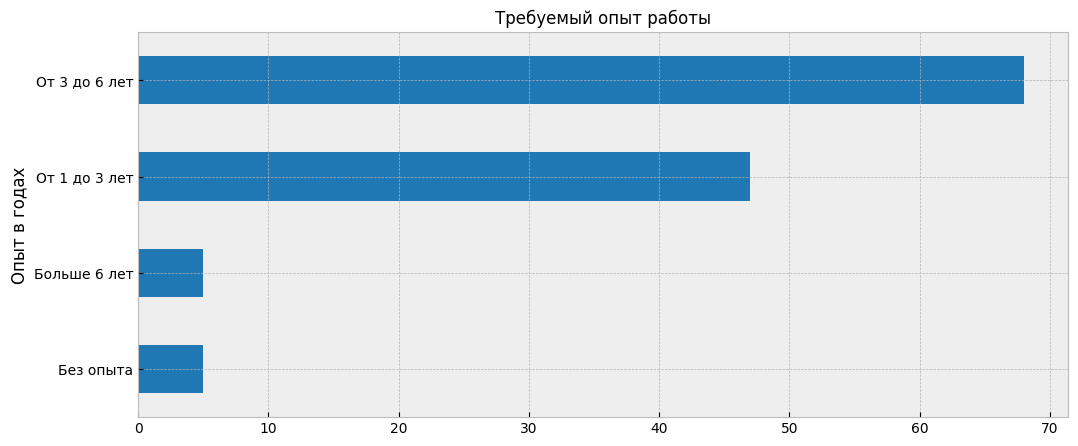

In [27]:
#Опыт работы
df_clean.value_counts('experience').sort_values().plot(
    kind = 'barh',
    figsize = (12,5),
    cmap = 'tab10'
)
plt.title('Требуемый опыт работы', fontsize = 12 )
plt.ylabel('Опыт в годах');

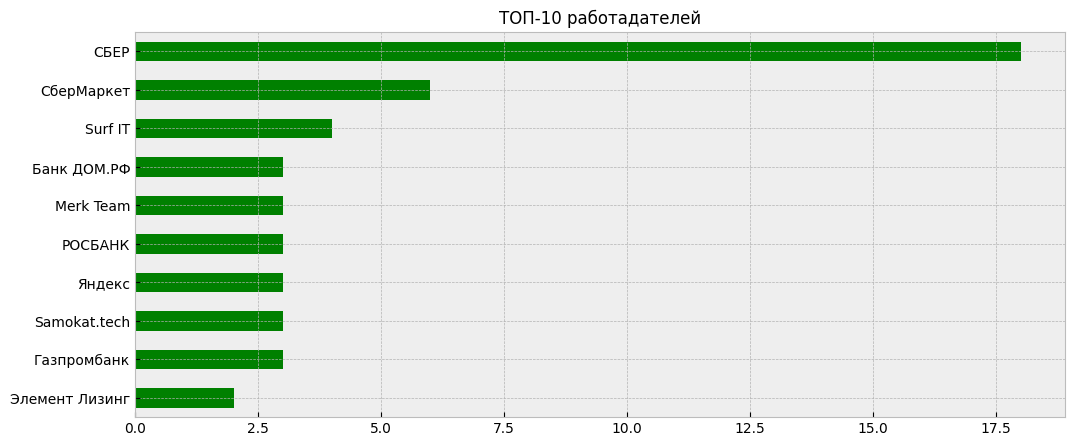

In [32]:
#Топ 10
df_clean.value_counts('employer').head(10).sort_values().plot(
    kind = 'barh',
    figsize = (12,5),
    color = 'green'
)
plt.title('ТОП-10 работадателей', fontsize = 12 )
plt.ylabel('');

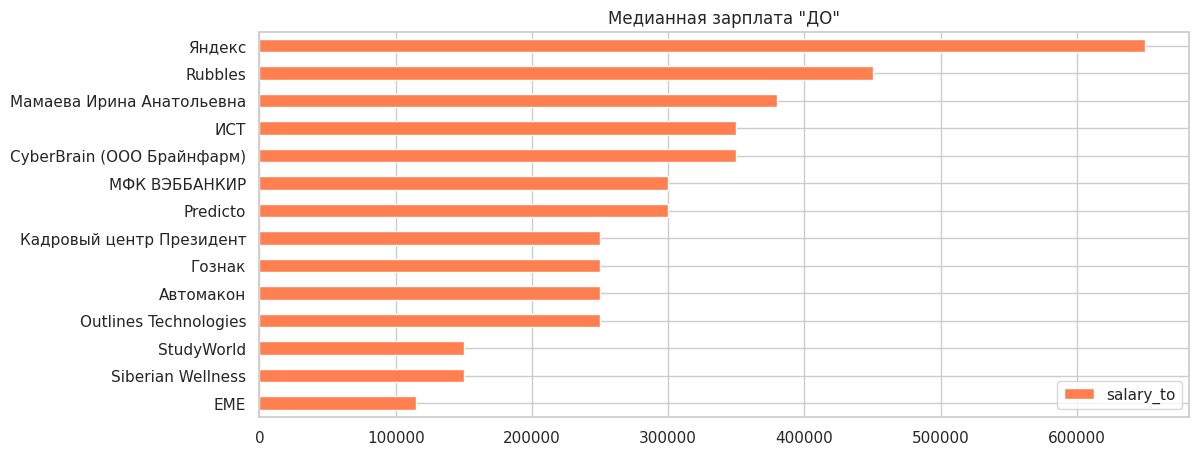

In [36]:
#график мединанных значений зарплаты "до"
(
    df_clean.pivot_table('salary_to', index = 'employer',aggfunc = 'median')
    .sort_values('salary_to')
    .plot(
        kind = 'barh',
        figsize = (12,5),
        color = 'coral',
        legend = True
        )
)
plt.title('Медианная зарплата "ДО"', fontsize = 12)
plt.xlabel('')
plt.ylabel('')
plt.show();

In [41]:
#временной ряд с датами публикации вакансий и откликов
count_series = df_clean.pivot_table('tot_responses', 'published_at')
count_series = count_series.resample('1d').sum()

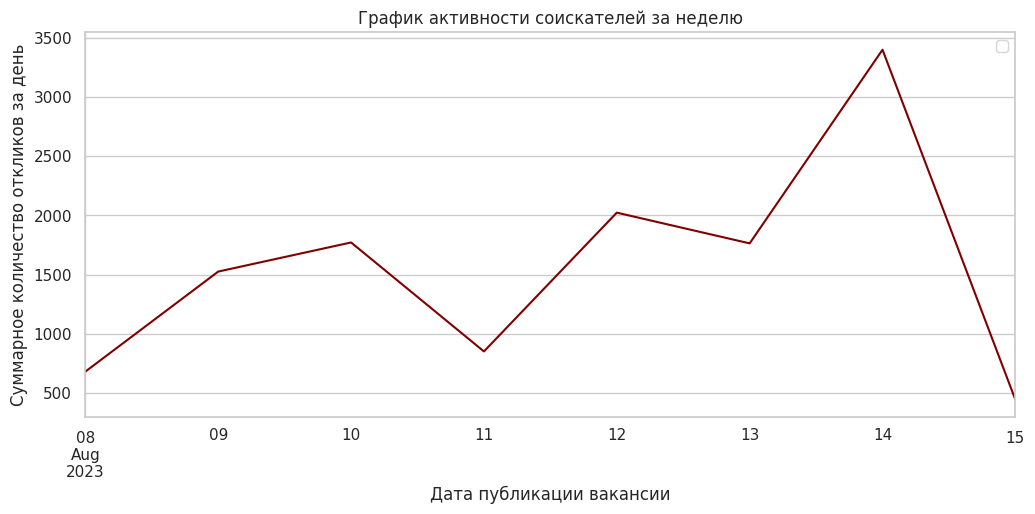

In [47]:
#график активности соискателей за неделю
count_series.plot(
    figsize = (12,5),
    color = 'maroon'
)
plt.title('График активности соискателей за неделю')
plt.xlabel('Дата публикации вакансии')
plt.ylabel('Суммарное количество откликов за день')
plt.legend('');

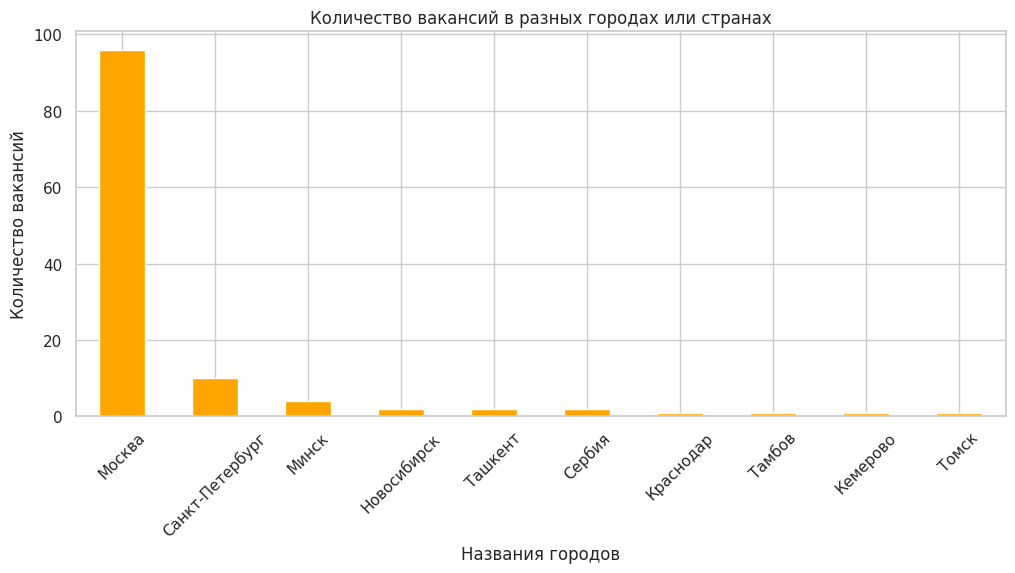

In [55]:
#статистика вакансий по городам ТОП-10
df_clean.city.value_counts().head(10).plot.bar(
    figsize = (12,5),
    color = 'orange',
    rot = 45
)
plt.title('Количество вакансий в разных городах или странах')
plt.xlabel('Названия городов')
plt.ylabel('Количество вакансий');

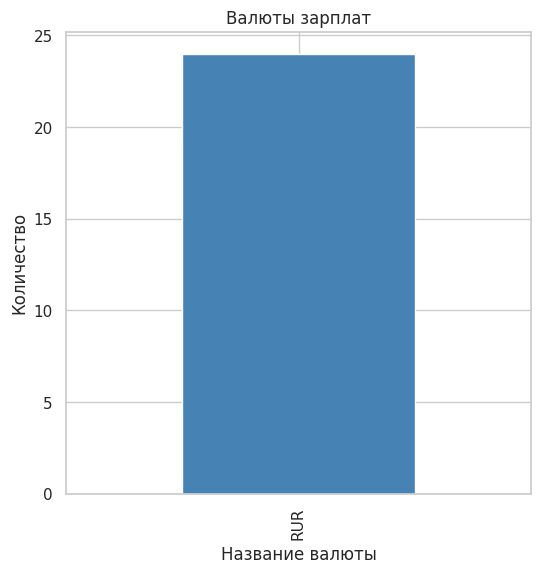

In [59]:
#валюта зарплат
df_clean.currency.value_counts().plot.bar(
    figsize = (6,6),
    color = 'steelblue'
)
plt.title('Валюты зарплат')
plt.xlabel('Название валюты')
plt.ylabel('Количество');

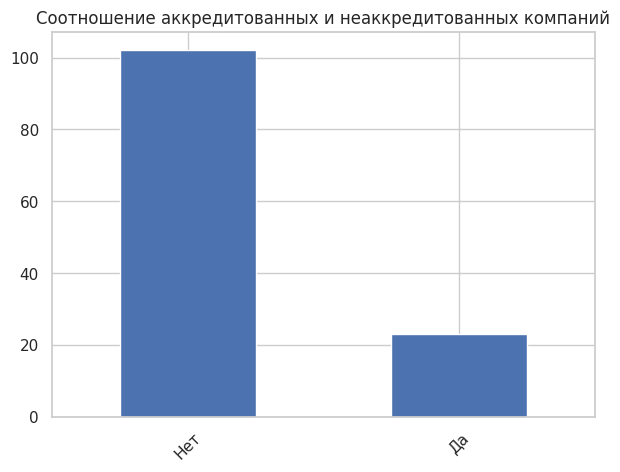

In [67]:
#аккредитация компаний
df_clean.accredited.value_counts().plot.bar(
    figsize = (7,5),
    rot = 45
)
plt.title('Соотношение аккредитованных и неаккредитованных компаний')
plt.xlabel('')
plt.ylabel('')
plt.xticks(ticks = [0,1], labels = ['Нет','Да']);